<h1>Traffic Analysis</h1>
<h2>Notebook to read, preprocess, and visualize US Traffic 2015 dataset</h2>
<br><h3>Submitted by: Shashank Srivatava, PhD</h3>
Email: shas.srivastava@gmail.com
<br>Date: Spetember 12, 2021

This notebook contains codes, results and corresponding insights from US Traffic 2015 data set available at: https://www.kaggle.com/jboysen/us-traffic-2015 in a step-by-step manner. Each code-cell has a description and contains comments, wherever necessary, to explain the logic and working of the code.
<br>Each results are followed by an analysis of finding and insights drawn about the traffic behavior.
<br>All the codes are written in Python and can be compiled using any Python 3.7 or higher interpreter.

<h3>Library Imports</h3>

In [1]:
# Library imports
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from time import time
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

<h3>Define a function to read txt datafiles</h3>
This function read the files from user provided path and filename, cleans and preprocess the data, and outputs a DataFrame

In [2]:
# Function to read, clean and convert raw data in text file to a pandas DataFrame
def read_raw_data(src_path: 'str', filename: 'str') -> DataFrame:
    file_path = os.path.join(src_path, filename)
    with open(file_path, 'r', encoding='utf-8-sig') as f:
        data_list = f.readlines()
    # First row of raw text file are headers/column names
    columns = data_list[0].split(',')
    # Read data into an empty list
    data = []
    print('Data rows = {}'.format(len(data_list)))  
    # for i in range(1, 28467):
    for i in range(1, len(data_list)):
        data.append(data_list[i].split(','))
    # Convret list to a pandas DataFrame
    df = DataFrame(data = data, columns = columns)
    # Clean data
    df.columns = df.columns.str.replace('\n', '')
    df = df.replace(r'\n','', regex=True)
    df = df.replace('"', '', regex=True)
    return df   

<h3>Read data in a pandas DataFrame</h3>
Read cleaned datasets by calling 'read_raw_data' function and print number of rows and time takes to read the raw data
<br>Note: A local path is provided for the source. This should be modified by user by inserting their path to raw data files on the local system.

In [3]:
# Datafile source directory and filename
src = r'C:\Users\Shashank.Srivastava\Documents\ocbc'

# File names
filename_traffic = r'dot_traffic_2015.txt'
filename_stations = r'dot_traffic_stations_2015.txt'

# Read raw txt data into DataFrames
t1 = time()
raw_traffic = read_raw_data(src, filename_traffic)
t2 = time()
print('Traffic file loaded in {:.4f} seconds'.format(t2-t1))
raw_stations = read_raw_data(src, filename_stations)
t3 = time()
print('Traffic file loaded in {:.4f} seconds'.format(t3-t2))

# Garbage collection
del src, filename_stations, filename_traffic, t1, t2, t3

Data rows = 7140392
Traffic file loaded in 978.9761 seconds
Data rows = 28467
Traffic file loaded in 3.7591 seconds


<h3>Inspect Raw Traffic Data</h3>
Inspect columns in the dataset. Remove any empty or redundant columns.

In [4]:
# Inspect raw_traffic dataset
print('Traffic data row: {}'.format(raw_traffic.shape[0]))

for col in raw_traffic.columns:
    print(col)

print(raw_traffic.head())

# Check if 'restrictions' columns has any value
print(np.unique(raw_traffic['restrictions']))

# Drop reduntant or empty columns
raw_traffic = raw_traffic.drop(columns=['date', 'direction_of_travel_name', 
                                'functional_classification_name', 'restrictions'])



Traffic data row: 7140391
date
day_of_data
day_of_week
direction_of_travel
direction_of_travel_name
fips_state_code
functional_classification
functional_classification_name
lane_of_travel
month_of_data
record_type
restrictions
station_id
traffic_volume_counted_after_0000_to_0100
traffic_volume_counted_after_0100_to_0200
traffic_volume_counted_after_0200_to_0300
traffic_volume_counted_after_0300_to_0400
traffic_volume_counted_after_0400_to_0500
traffic_volume_counted_after_0500_to_0600
traffic_volume_counted_after_0600_to_0700
traffic_volume_counted_after_0700_to_0800
traffic_volume_counted_after_0800_to_0900
traffic_volume_counted_after_0900_to_1000
traffic_volume_counted_after_1000_to_1100
traffic_volume_counted_after_1100_to_1200
traffic_volume_counted_after_1200_to_1300
traffic_volume_counted_after_1300_to_1400
traffic_volume_counted_after_1400_to_1500
traffic_volume_counted_after_1500_to_1600
traffic_volume_counted_after_1600_to_1700
traffic_volume_counted_after_1700_to_1800
traffi

<h3>Convert Data to Appropriate Datatypes</h3>
All columns except two as mentioned in code below have numeric data types and must be converted from str

In [5]:
# Datatype conversion to numeric values
for col in raw_traffic.columns:
    if col not in ['functional_classification', 'station_id']:
        raw_traffic[col] = pd.to_numeric(raw_traffic[col], errors='coerce')


<h3>Inspect Raw Station Data</h3>
Inspect columns in the dataset. Remove any empty or redundant columns and print head to inspect data.

In [6]:
# Inspect raw_station dataset
for col in raw_stations.columns:
    print(col)

print(raw_stations.head())

algorithm_of_vehicle_classification
algorithm_of_vehicle_classification_name
calibration_of_weighing_system
calibration_of_weighing_system_name
classification_system_for_vehicle_classification
concurrent_route_signing
concurrent_signed_route_number
direction_of_travel
direction_of_travel_name
fips_county_code
fips_state_code
functional_classification
functional_classification_name
hpms_sample_identifier
hpms_sample_type
lane_of_travel
lane_of_travel_name
latitude
longitude
lrs_identification
lrs_location_point
method_of_data_retrieval
method_of_data_retrieval_name
method_of_traffic_volume_counting
method_of_traffic_volume_counting_name
method_of_truck_weighing
method_of_truck_weighing_name
method_of_vehicle_classification
method_of_vehicle_classification_name
national_highway_system
number_of_lanes_in_direction_indicated
number_of_lanes_monitored_for_traffic_volume
number_of_lanes_monitored_for_truck_weight
number_of_lanes_monitored_for_vehicle_class
posted_route_signing
posted_signed_

<h1>Traffic Data Visualization</h1>
<h3>By Day of Week</h3>
Assumption: Day 1 is Sunday, Day 2 is Monday and so on
<br>Separate data by day of week and further break it down to hours of the day to find any trends in the traffic data.

In [7]:
# Visualize traffic data by day of week
day_of_week = []
# Days of week range from 1 through 7
for i in range(1,8):
    df = raw_traffic[raw_traffic['day_of_week']==i]
    # Columns 9 through 32 are traffic volume per hour
    hour_of_day = []
    for j in range(9,33):
        hour_of_day.append(df.iloc[:,j].sum())
    day_of_week.append(np.array(hour_of_day).T)

days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# DataFrame -> 24(rows: hours every day) * 7 (columns: days of week)
df = pd.DataFrame(data=np.array(day_of_week).T, columns=days)

# print(df.head(24))

<h3>Plot hourly-data for each day of the week for the complete time-period of data collection.</h3>

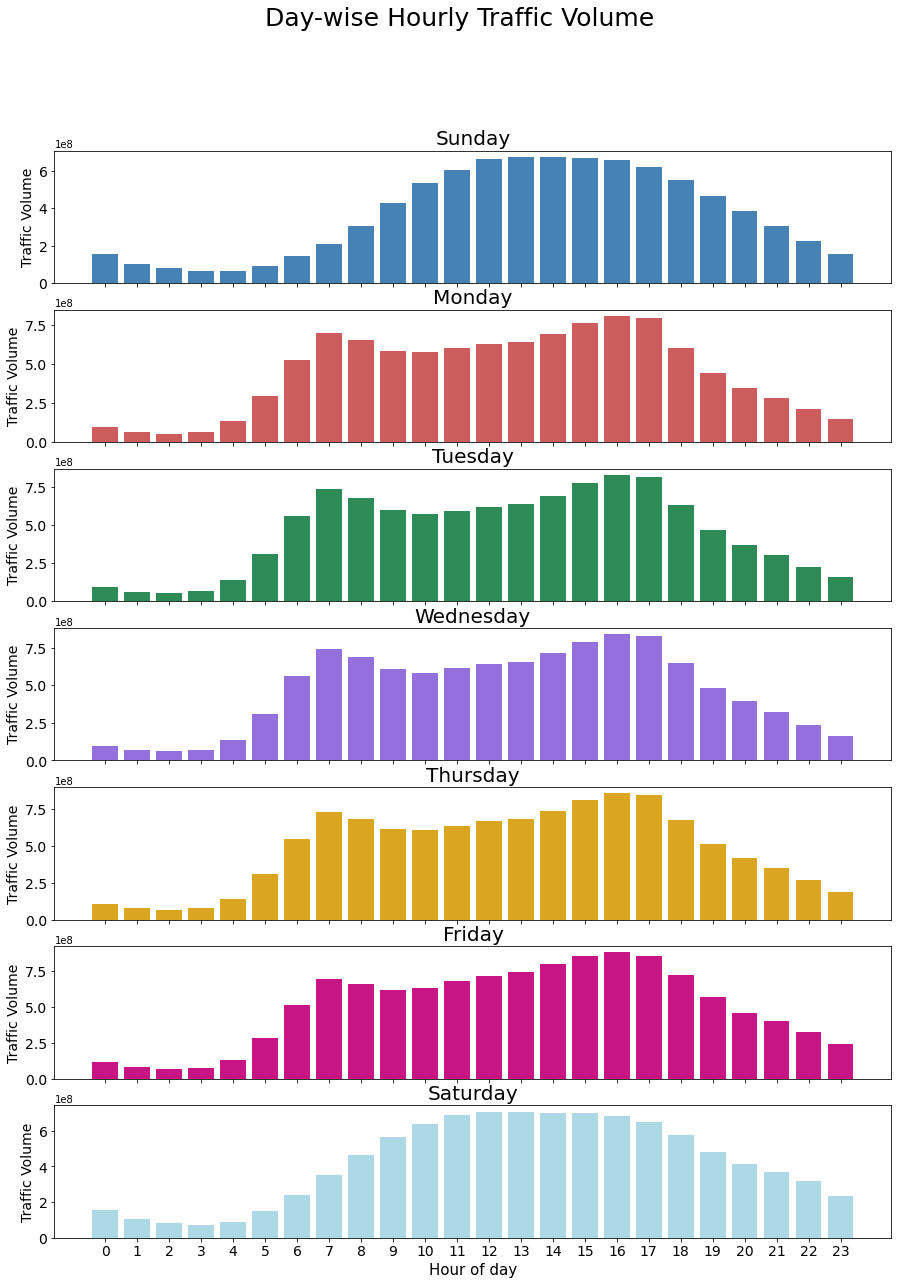

In [8]:
# Visualize hourly data for each day
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, sharex=True, figsize=(15,20))

fig.suptitle("Day-wise Hourly Traffic Volume", fontsize=25)
plt.xlabel('Hour of day', fontsize=15)
x = np.arange(24)
plt.xticks(list(x))

# Day 1
ax1.set_title('Sunday', fontdict={'fontsize': 20})
ax1.set_ylabel('Traffic Volume', fontdict={'fontsize': 14})
ax1.bar(x, np.array(df.iloc[:,0]), color='steelblue')
ax1.tick_params(axis='both', labelsize=14)
# Day 2
ax2.set_title('Monday', fontdict={'fontsize': 20})
ax2.set_ylabel('Traffic Volume', fontdict={'fontsize': 14})
ax2.bar(x, np.array(df.iloc[:,1]), color='indianred')
ax2.tick_params(axis='both', labelsize=14)
# Day 3
ax3.set_title('Tuesday', fontdict={'fontsize': 20})
ax3.set_ylabel('Traffic Volume', fontdict={'fontsize': 14})
ax3.bar(x, np.array(df.iloc[:,2]), color='seagreen')
ax3.tick_params(axis='both', labelsize=14)
# Day 4
ax4.set_title('Wednesday', fontdict={'fontsize': 20})
ax4.set_ylabel('Traffic Volume', fontdict={'fontsize': 14})
ax4.bar(x, np.array(df.iloc[:,3]), color='mediumpurple')
ax4.tick_params(axis='both', labelsize=14)
# Day 5
ax5.set_title('Thursday', fontdict={'fontsize': 20})
ax5.set_ylabel('Traffic Volume', fontdict={'fontsize': 14})
ax5.bar(x, np.array(df.iloc[:,4]), color='goldenrod')
ax5.tick_params(axis='both', labelsize=14)
# Day 6
ax6.set_title('Friday', fontdict={'fontsize': 20})
ax6.set_ylabel('Traffic Volume', fontdict={'fontsize': 14})
ax6.bar(x, np.array(df.iloc[:,5]), color='mediumvioletred')
ax6.tick_params(axis='both', labelsize=14)
# Day 7
ax7.set_title('Saturday', fontdict={'fontsize': 20})
ax7.set_ylabel('Traffic Volume', fontdict={'fontsize': 14})
ax7.bar(x, np.array(df.iloc[:,6]), color='lightblue')
ax7.tick_params(axis='both', labelsize=14)


<h2>Insights from hourly traffic</h2>
The peak traffic hours differ from the weekdays and weekends (Saturday and Sunday), as clearly observed from the bar chart. People tend to move around at later hours of the day on the weekends. The traffic patterns observed on Saturdays and Sundays show remarkable similarities which is expected.
<br>The late night/early morning traffic on the weekend is visibly higher than the corresponding values on the weekday which clearly reflects the incresed travel and outdoor activities on the weekends.
<br>There are two peak periods of traffic on weekdays between 7 am to 9 am and 4 pm to 6 pm. This aligns with American work hours and indicates traffic to and from the workplace. 
<br>If the volume of traffic moving in a given direction in morning is equal to the traffic volume in opposite direction in the eveningm then the hypothesis is true. This is can investigated as per the following analysis.

In [9]:
df_morning = raw_traffic[['day_of_week', 'direction_of_travel', 'traffic_volume_counted_after_0700_to_0800', 
                          'traffic_volume_counted_after_0800_to_0900']]
df_evening = raw_traffic[['day_of_week', 'direction_of_travel', 'traffic_volume_counted_after_1600_to_1700', 
                          'traffic_volume_counted_after_1700_to_1800']]

# Anasylis applicable for weekdays only, i.e. Day 2  through Day 6
df_morning = df_morning[df_morning['day_of_week'].isin([2, 3, 4, 5, 6])]
df_evening = df_evening[df_evening['day_of_week'].isin([2, 3, 4, 5, 6])]

# Drop 'day_of_week' column
df_morning = df_morning.drop(columns=['day_of_week'])
df_evening = df_evening.drop(columns=['day_of_week'])

# Check number of possible directions in the dataset
print('Number of unique directions are {}'.format(np.unique(df_morning['direction_of_travel'])))

Number of unique directions are [0 1 2 3 4 5 6 7 8 9]


<h3>Morning Traffic</h3>
Traffic volume in each unique direction during the morning hours defined here between 7 am and 9 am is calculated here.

In [10]:
cumulative_morning_dir = []
# There are 10 unique directions: [0, 1, ..., 9]
for i in range(0, 10):
    morning_dir = df_morning[df_morning['direction_of_travel'] == i]
    # After filtering, the 'direction_of_traval' column can be dropped
    morning_dir = morning_dir.drop(columns=['direction_of_travel'])
    # Add all morning traffic between 7 am to 9 am for the direction of loop counter
    cumulative_morning_dir.append(morning_dir.to_numpy().sum())
    del morning_dir

print(cumulative_morning_dir)

# Garbage collection
del df_morning

[77622201, 1994143708, 14810403, 1362519688, 22621403, 1957246087, 16671146, 1361860869, 21358985, 134585552]


<h3>Evening Traffic</h3>
Traffic volume in each unique direction during the evening hours defined here between 4 pm and 6 pm is calculated here.

In [11]:
cumulative_evening_dir = []
# There are 10 unique directions: [0, 1, ..., 9]
for i in range(0, 10):
    evening_dir = df_evening[df_evening['direction_of_travel'] == i]
    # After filtering, the 'direction_of_traval' column can be dropped
    evening_dir = evening_dir.drop(columns=['direction_of_travel'])
    # Add all evening traffic between 4 pm to 6 pm for the direction of loop counter
    cumulative_evening_dir.append(evening_dir.to_numpy().sum())
    del evening_dir

print(cumulative_evening_dir)

# Garbage collection
del df_evening

[93505638, 2388636345, 20429348, 1643516262, 27771931, 2332161341, 18358024, 1625144717, 26448274, 167814813]


<h3>Visualize Morning and Evening Traffic by Direction</h3>
<h4>Traffic Directions nomenclature from raw_traffic</h4>
<br>1: North,   2: North-East,   3: East,   4: South-East
<br>5: South,   6: South-West,   7: West,   8: North-West
<br>9: North-South or North-East and South-West combined
<br>0: East-West or South-East and North-West combined

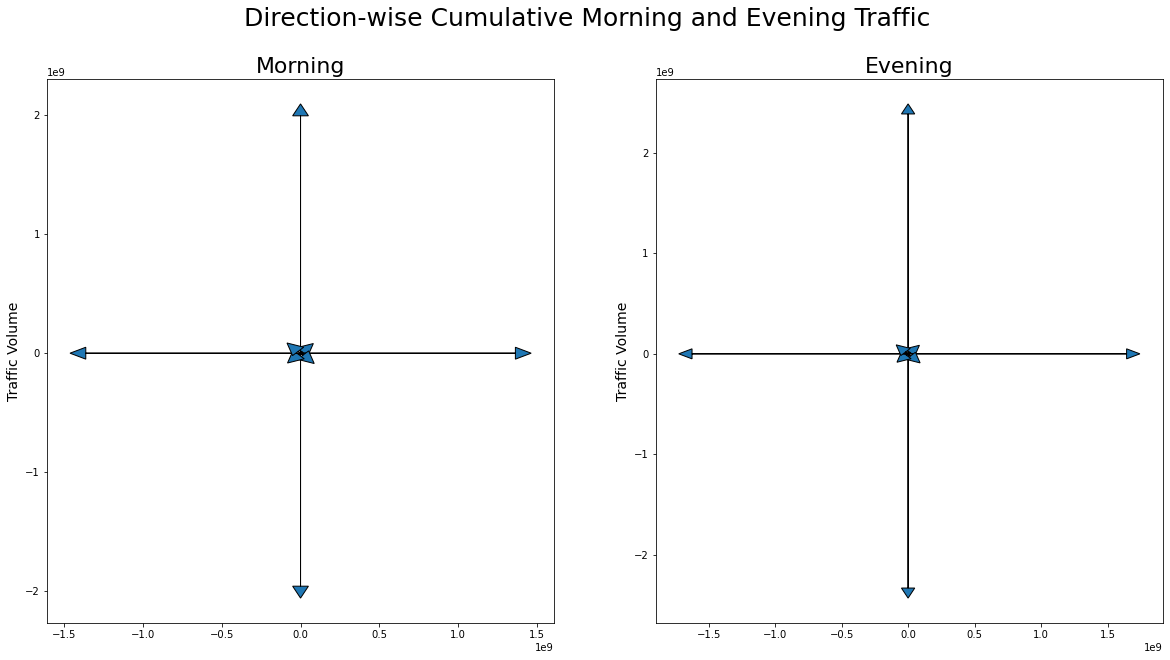

In [12]:
# Plot directions 1 through 8
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle("Direction-wise Cumulative Morning and Evening Traffic", fontsize=25)

# Define angles corresponding to directions [0, 1, .., 9]
# Assign 0 to directions 0 and 9 in degrees
angles = [0, 90, 45, 0, -45, -90, -135, 180, 135, 0]

# Plot Morning Traffic by direction 1 through 8
ax1.set_title('Morning', fontdict={'fontsize': 22})
ax1.set_ylabel('Traffic Volume', fontdict={'fontsize': 14})
for i in range(1,9):
    ax1.arrow(0, 0, cumulative_morning_dir[i]*np.cos(angles[i]*np.pi/180), cumulative_morning_dir[i]*np.sin(angles[i]*np.pi/180), 
              head_width=0.01e10, head_length=0.01e10)

# Plot Evening Traffic by direction 1 through 8
ax2.set_title('Evening', fontdict={'fontsize': 22})
ax2.set_ylabel('Traffic Volume', fontdict={'fontsize': 14})
for i in range(1,9):
    ax2.arrow(0, 0, cumulative_evening_dir[i]*np.cos(angles[i]*np.pi/180), cumulative_evening_dir[i]*np.sin(angles[i]*np.pi/180),
             head_width=0.01e10, head_length=0.01e10,)


# Garbage Collection
del angles

<h3>Insights from Directional analysis</h3>
The morning and evening traffic in opposing directions, specially North, South, East and West balance each other out individually in morning and evening time periods selected. Hence, it cannot be established that a group of commuters move back and forth in morning and evening as hypothesised.
<br><h4>However, given the almost equal amount of traffic volume in opposing direction, it can be concluded that there is no net movement of masses over the given period of time, such as mass-migration.</h4>

<h3>Visualize Cumulative Traffic per Day of week</h3>
A daily analysis of traffic volume per week is performed to see study the traffic patterns.

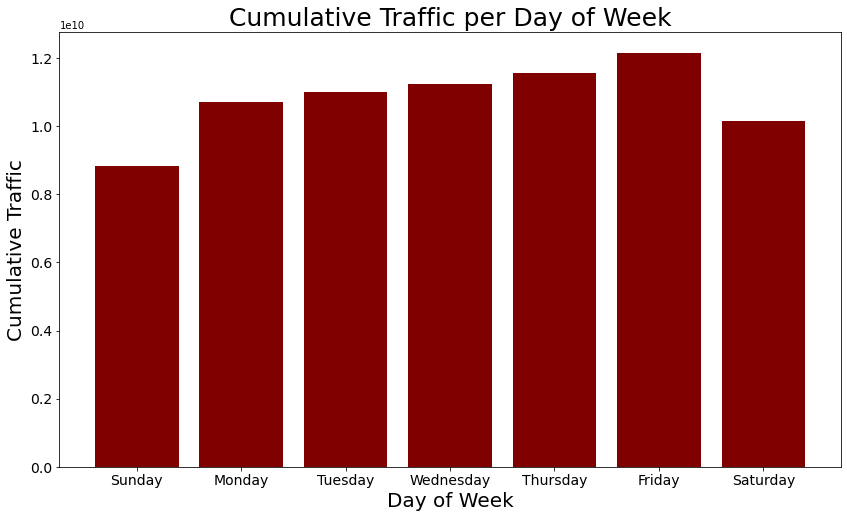

In [13]:
# Visualize daily cumulative traffic
cum_traffic = []
# For each day of the week (total = 7)
for i in range(0, 7):
    cum_traffic.append(df.iloc[:, i].sum())

cum_traffic = np.array(cum_traffic)

plt.figure(figsize=(14,8))
plt.title('Cumulative Traffic per Day of Week', fontsize=25)
plt.xlabel('Day of Week', fontsize=20)
plt.ylabel('Cumulative Traffic', fontsize=20)
plt.tick_params(axis='both', labelsize=14)
plt.bar(days, cum_traffic, color='maroon')

# Garbage collection
del cum_traffic

<h3>Insights from cumulative traffic based on day of week alalysis</h3>
Traffic volume increases consistently from Sunday to the 5 working days of the week, peaking on Friday and dropping down to the second value on Saturday.
<br>This can be explained by two peak periods observed on the weekdays compared to a single mild surge of traffic on the weekends.

<h3>Traffic Data Visualization By Month of Year</h3>
Visualize traffic volume independant of direction by month to find any seasonal patters or insights on the local traffic behaviour.

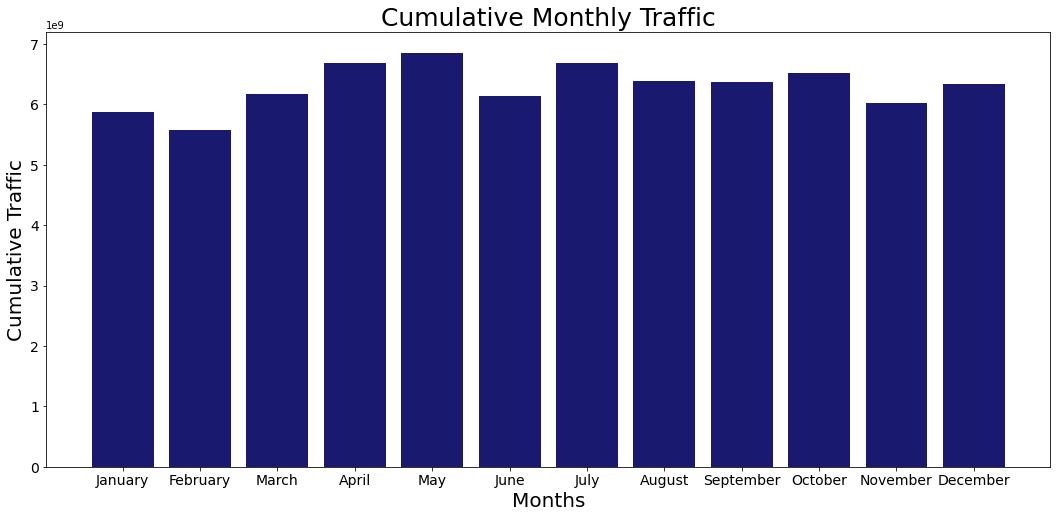

In [14]:
# Visualize traffic data by month
month = []
# Months range from 1 through 12
for i in range(1,13):
    df = raw_traffic[raw_traffic['month_of_data']==i]
    # Columns 9 through 32 are traffic volume per hour
    sum = 0
    for j in range(9,33):
        sum += df.iloc[:,j].sum()
    month.append(sum)

plt.figure(figsize=(18,8))
plt.title('Cumulative Monthly Traffic', fontsize=25)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Cumulative Traffic', fontsize=20)
plt.tick_params(axis='both', labelsize=14)
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December']
plt.bar(month_names, month, color='midnightblue')

# Garbage collection
del month, month_names, df, i


<h3>Insights from the Cumulative Monthly Traffic Volume Analysis</h3>
The traffic volume remains fairly consistent throughout the year with the only exception in June which has noticeably less traffic volume compared to neighbouring months. This could be due to some regional fators such as summer vacations in Schools or due to the local weather conditions.
<br>Overall there are no noticable patters in this analysis and any seasonal fluctuations can be written off.

<h3>Traffic Data Visualization By Direction of Travel and Time of the Day</h3>
Plot cumulative traffic in all unique directions against hour of the day to find everyday traffic patterns over the entire period of dataset provided.

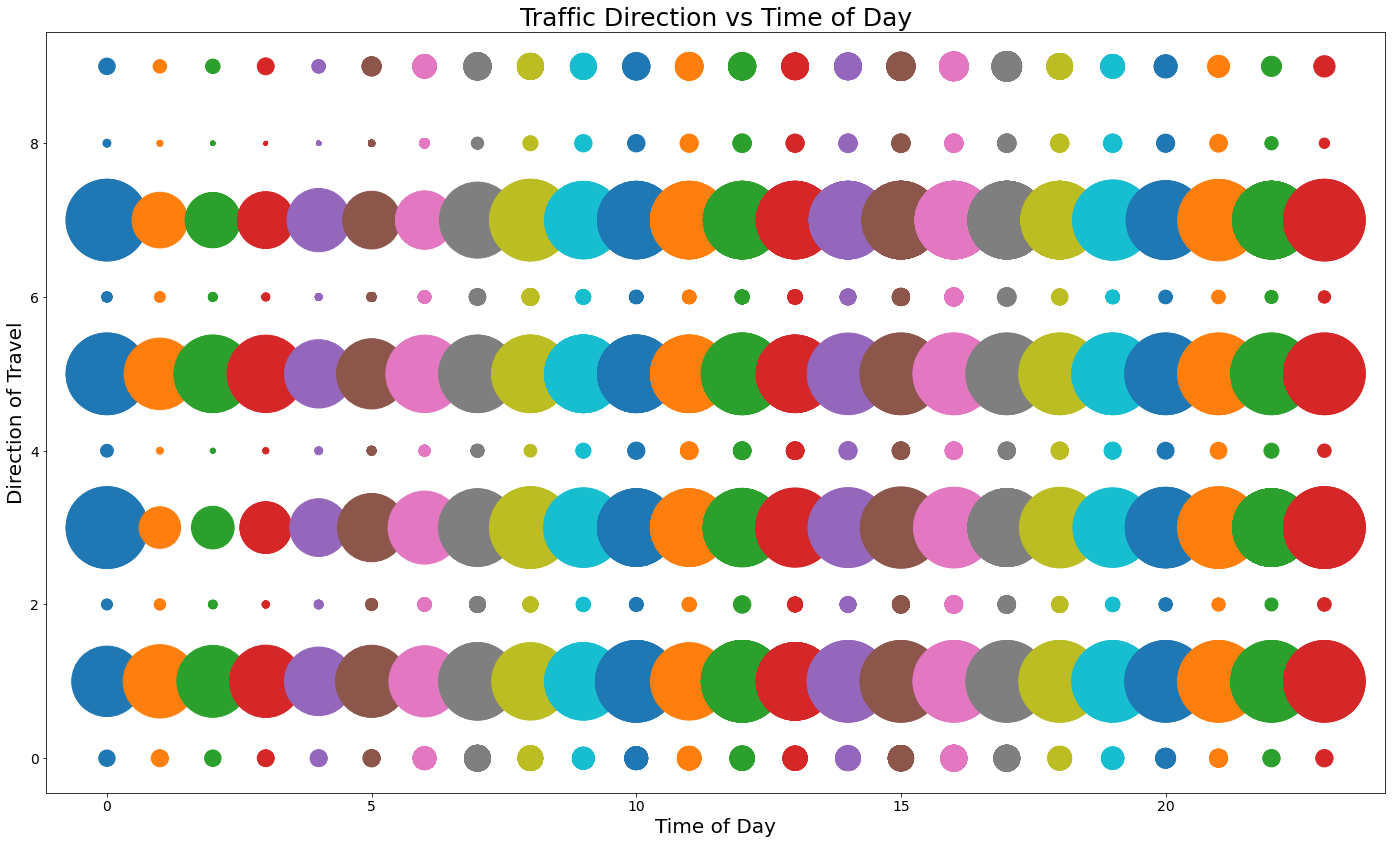

In [15]:
# Create a new DataFrame with Direction and Time of Day information
df = raw_traffic.iloc[:, 9:33]
df['direction_of_travel'] = raw_traffic['direction_of_travel'].values

# Define plot parameters
plt.figure(figsize=(24,14))
plt.title('Traffic Direction vs Time of Day', fontsize=25)
plt.xlabel('Time of Day', fontsize=20)
plt.ylabel('Direction of Travel', fontsize=20)
plt.tick_params(axis='both', labelsize=14)

# Scale the scatter plot size
scale_factor = 15


for i in range(0,24):
    plt.scatter(i*np.ones(len(df)), np.array(df.iloc[:, 24]),
                s=np.array(df.iloc[:, i])/scale_factor)
      
plt.show()

# Garbage Collection
del df, i, scale_factor


<h3>Insights from the Hourly Traffic Volume By Direction Analysis</h3>
The four directions namely North, South, East and West have significantly higher traffic rates than other. However, this insight was already gained from a previous analysis.
<br>What this analysis highlights is that despite of couple of peak traffic hours on weekdays, the traffic in these 4 directions remain fairly consistent throughout the day. It is also noticible that the East-West traffic volume falls significantly after midnight. However, this is not the case for the North-South route. This is indicative of more Urban population in the North-South direction as compared to East-West direction.

<h3>Traffic Data Visualization By Direction-wise Cumulative Traffic</h3>
Cumulative traffic volume by direction. This has been analyzed for peak traffic hours and the code below analyzes it for the complete 24-hour cycle.

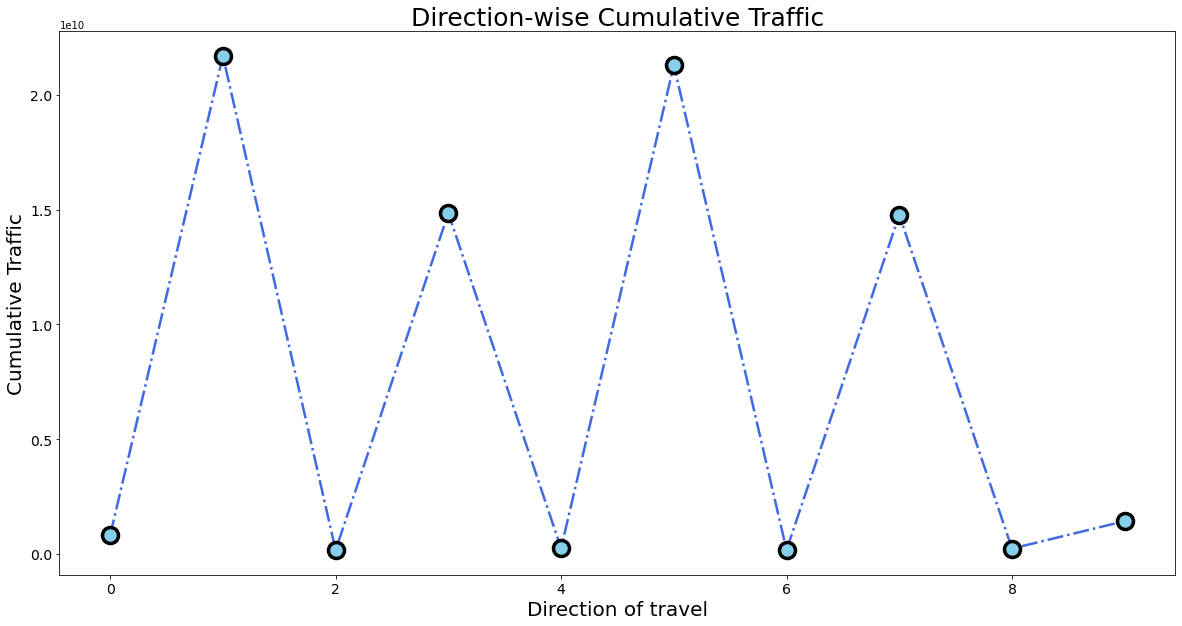

In [16]:
# Create a new DataFrame with Direction and Time of Day information
df = raw_traffic.iloc[:, 9:33]
df['direction_of_travel'] = raw_traffic['direction_of_travel'].values

# Define plot parameters
plt.figure(figsize=(20,10))
plt.title('Direction-wise Cumulative Traffic', fontsize=25)
plt.xlabel('Direction of travel', fontsize=20)
plt.ylabel('Cumulative Traffic', fontsize=20)
plt.tick_params(axis='both', labelsize=14)

dir_data = []
# Total 10 directions specified
for i in range(0, 10):
    dir_df = df[df['direction_of_travel'] == i]
    # Cumulative traffic is sum of all traffic data (dir_df) except the 'direction of travel' column
    dir_df = dir_df.drop(columns=['direction_of_travel'])
    dir_data.append(dir_df.to_numpy().sum())

dir_data = np.array(dir_data)
plt.plot(np.arange(0,10), dir_data,  color='royalblue', marker='o', linestyle='-.',
         linewidth=2.5, markersize=16, markeredgecolor='black', markeredgewidth=3.5,
        markerfacecolor='skyblue')
# plt.scatter(np.arange(0,9), dir_data)
plt.show()    

# Garbage collection
del df, i, dir_data

<h3>Insights from the Traffic Volume By Direction Analysis</h3>
The discrepancy in the traffic volume in the major traffic directions namely North, South, East and West and minor traffic dictions namely North-East, North-West, South-East and South-West as seen for peak hour traffic analysis by direction is much less pronounced for cumulated 24 hrs analysis. This indicates that the peak hour traffic effects only the major direction traffic and the minor direction traffic volume remains steady on a smaller number with some fluctuations throughout the day.